# Create Wrapper Function for Externally Deployed DataRobot Model

## Overview
In this notebook you will create a WML wrapper function for a model deployed in an external environment. If models are deployed in an external environment and the payload input/output format of that environment exactly matches that of Watson Machine Learning, then the environment can be setup as a Custom Service Provider in OpenScale (https://www.ibm.com/docs/en/cloud-paks/cp-data/3.5.0?topic=models-custom-ml-frameworks). Alternatively, if the payload input/output format does not match the format of Watson Machine Learning deployments, then the solution is to create a proxy WML endpoint for the external deployment. The proxy endpoint is a python function that converts the input/output payloads into the correct format and calls the existing deployment. In addition, this function checks whether the model usability status in OpenPages is set to "Allow" before calling the endpoint. For this exercise, we have deployed the airline delay model in an external environment called Heroku. The input/output format for this deployment resembles that of a DataRobot model.

## Prerequisites

1. Your external model endpoint has already been created using Heroku.
2. A WML deployment space already exists for your model.
3. An OpenPages model entry has been created for this model. 

## Steps

### 1. Open the provided JSON file 'wrapper_config_ext_template.json' in a text editor.  Fill in each of the required parameters as described below:
    - "external_url" : URL for Heroku Model Endpoint 
    - "username": Heroku username
    - "api_key" : Heroku API Key
    - "cpd_username" : Cloud Pak for Data username
    - "cpd_api_key" : Cloud Pak for Data user API Key
    - "deployment_space": Name of WML deployment space where wrapper function should be stored
    - "function_name": Desired name of wrapper function
    - "deployment_name": Desired name of deployment for wrapper function
    - "op_api_key": OpenPages API Key
    - "model_status_field": Name of usability status field in OpenPages (use "MRG-Model:Usability Status")
    - "mrm_model_id": Corresponding MRM model ID in OpenPages
See the sample parameter values below for guidance (api keys omitted):

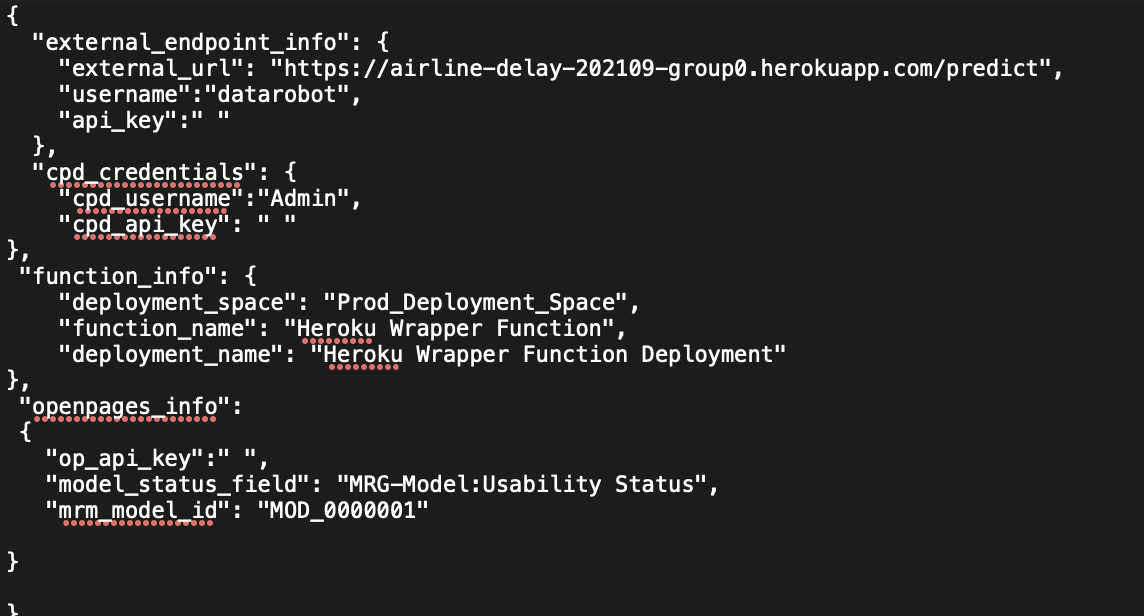

### 2. Save the JSON file locally, then upload the JSON file to your model development project in Cloud Pak for Data using the file upload UI on the righthand side of the project homepage.  Choose the 'browse' option and select the JSON file that you saved locally.

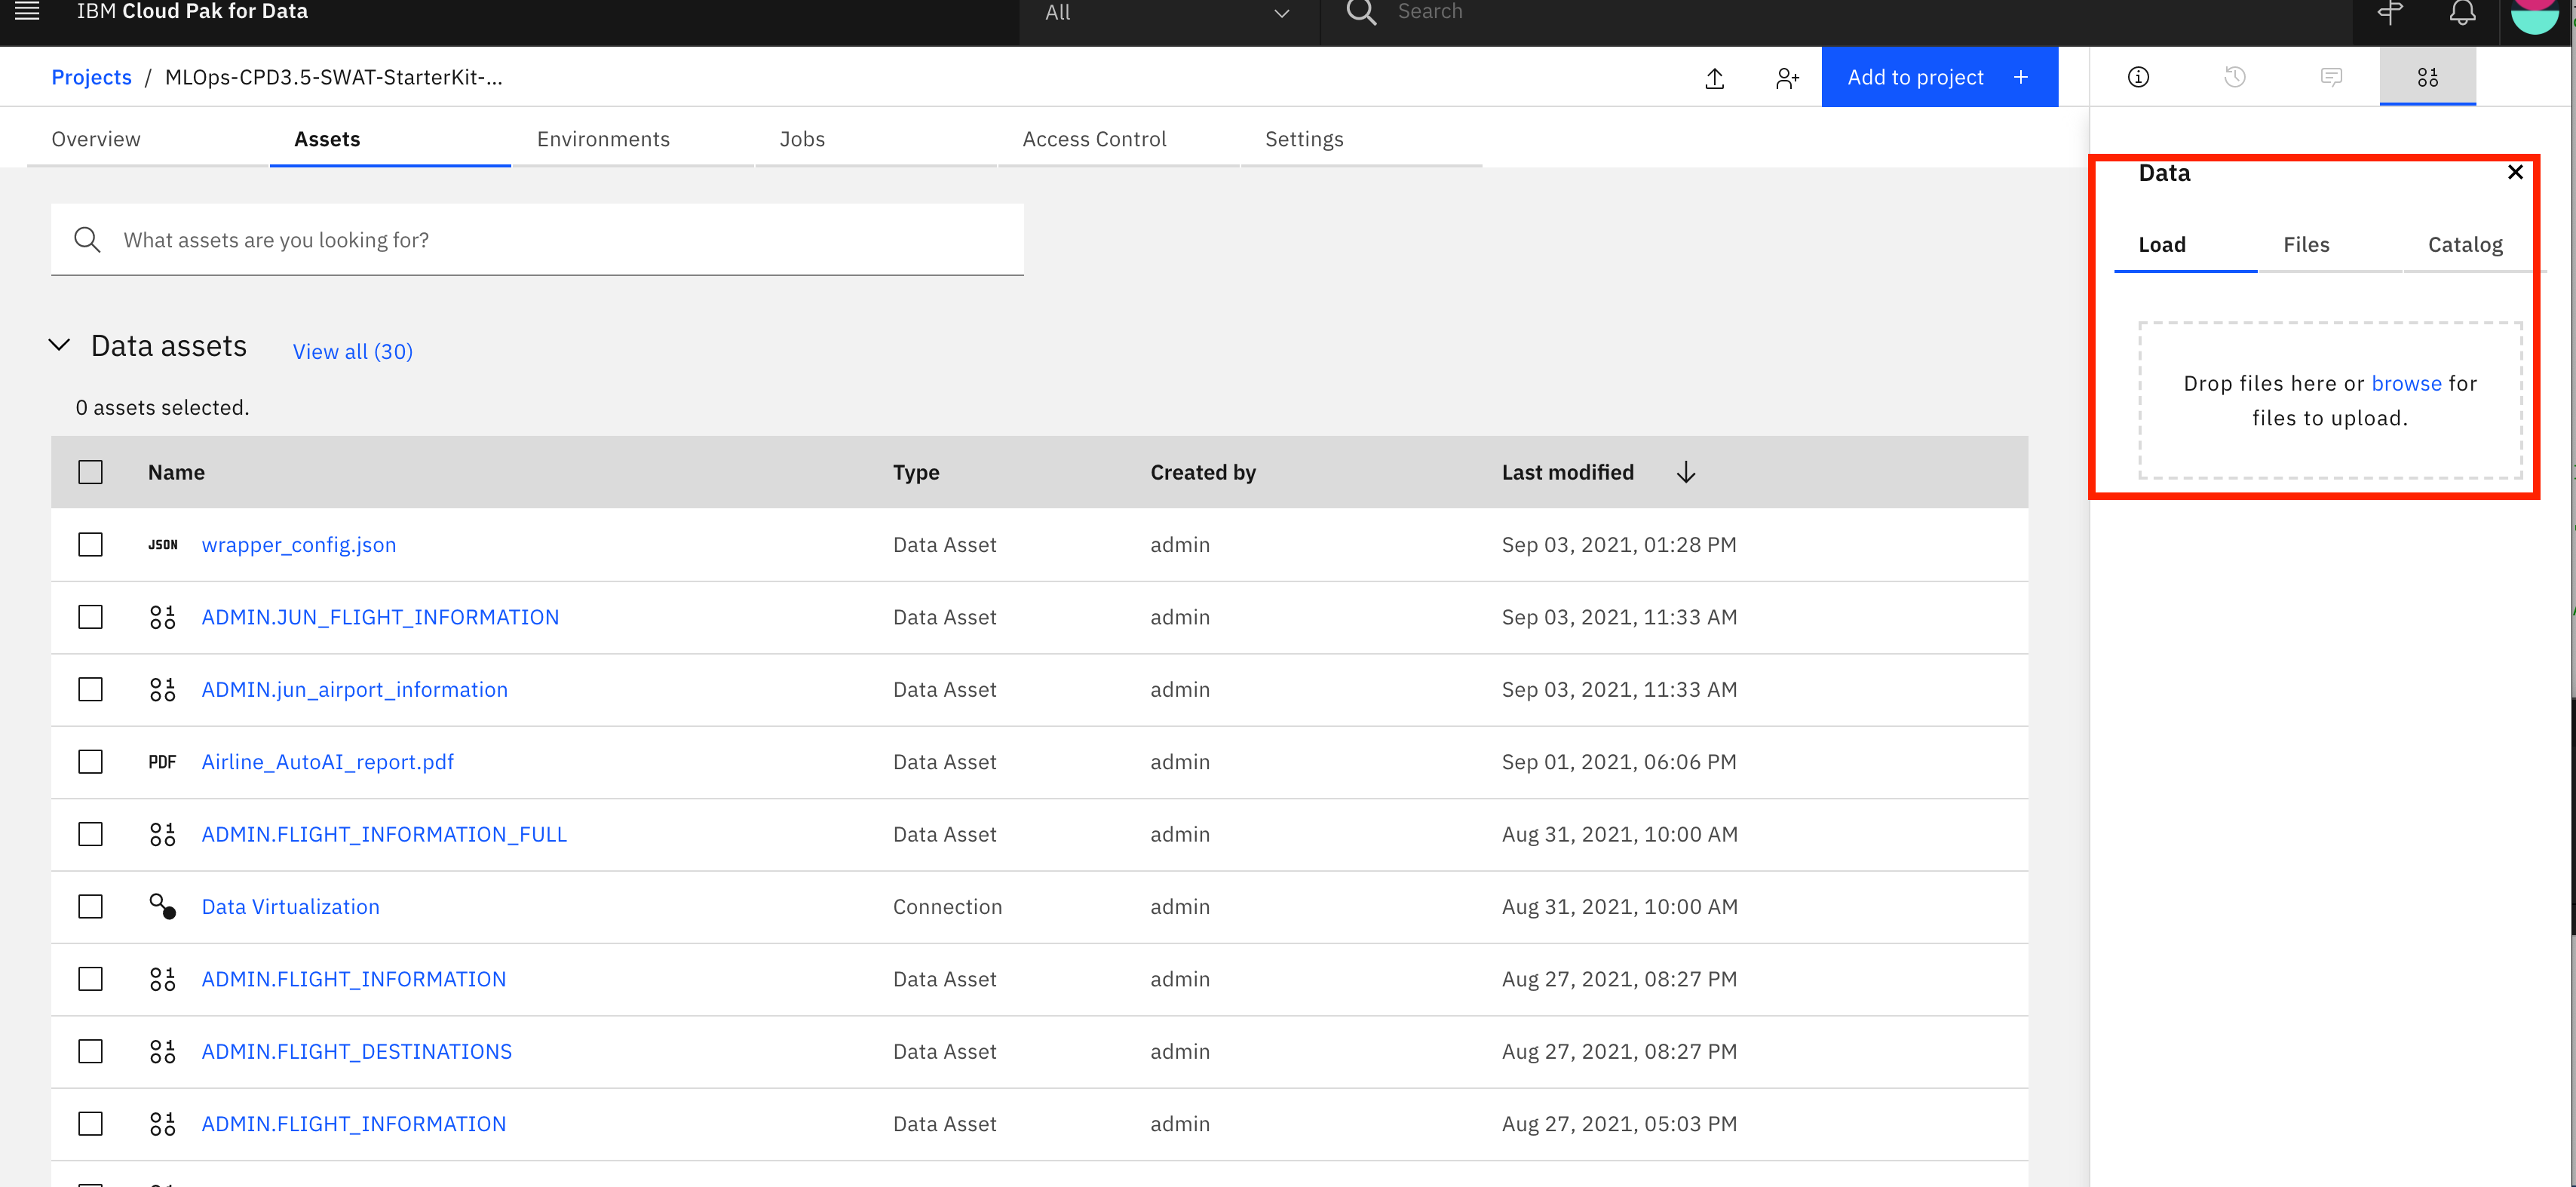

### 3. Upload the provided notebook 'Create Wrapper Function (DataRobot).ipynb' to your CPD project.  To do so, from the project homepage select the 'Add to project + ' box in blue on the top righthand side.  Choose 'notebook', and then navigate to the 'From file' tab in the following screen: 
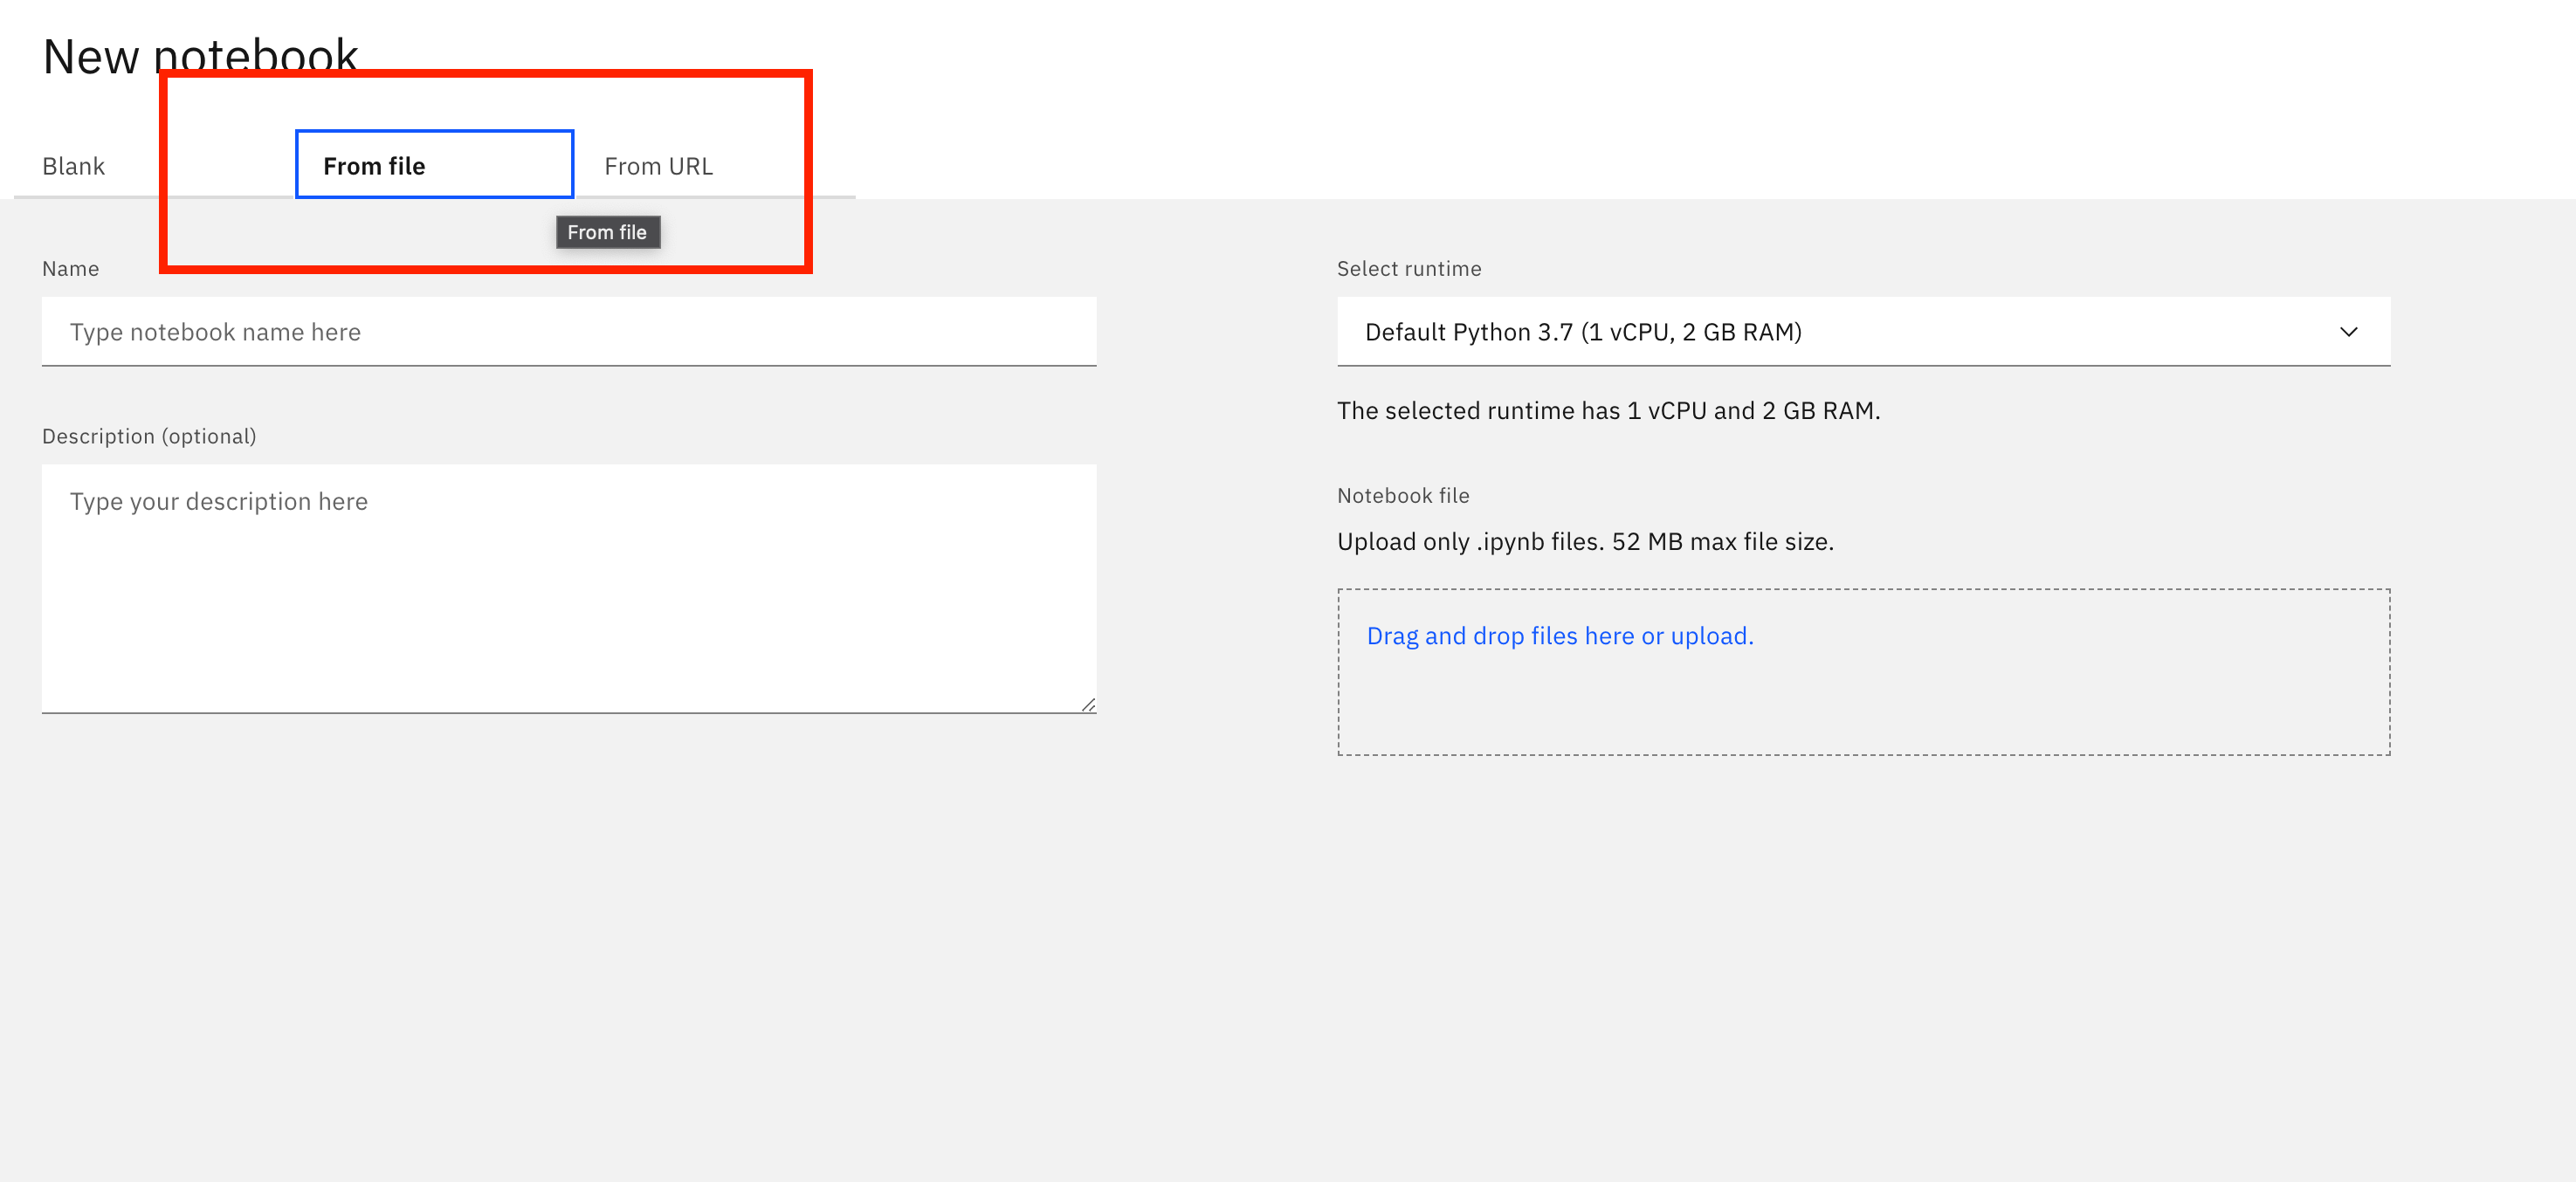

### 4. Select 'Drag and drop files here or upload'.  Then navigate to the notebook on your local system, leave the notebook name as is (Create Wrapper Function (DataRobot)) and then select 'Create' in the bottom righthand corner to upload to the project.
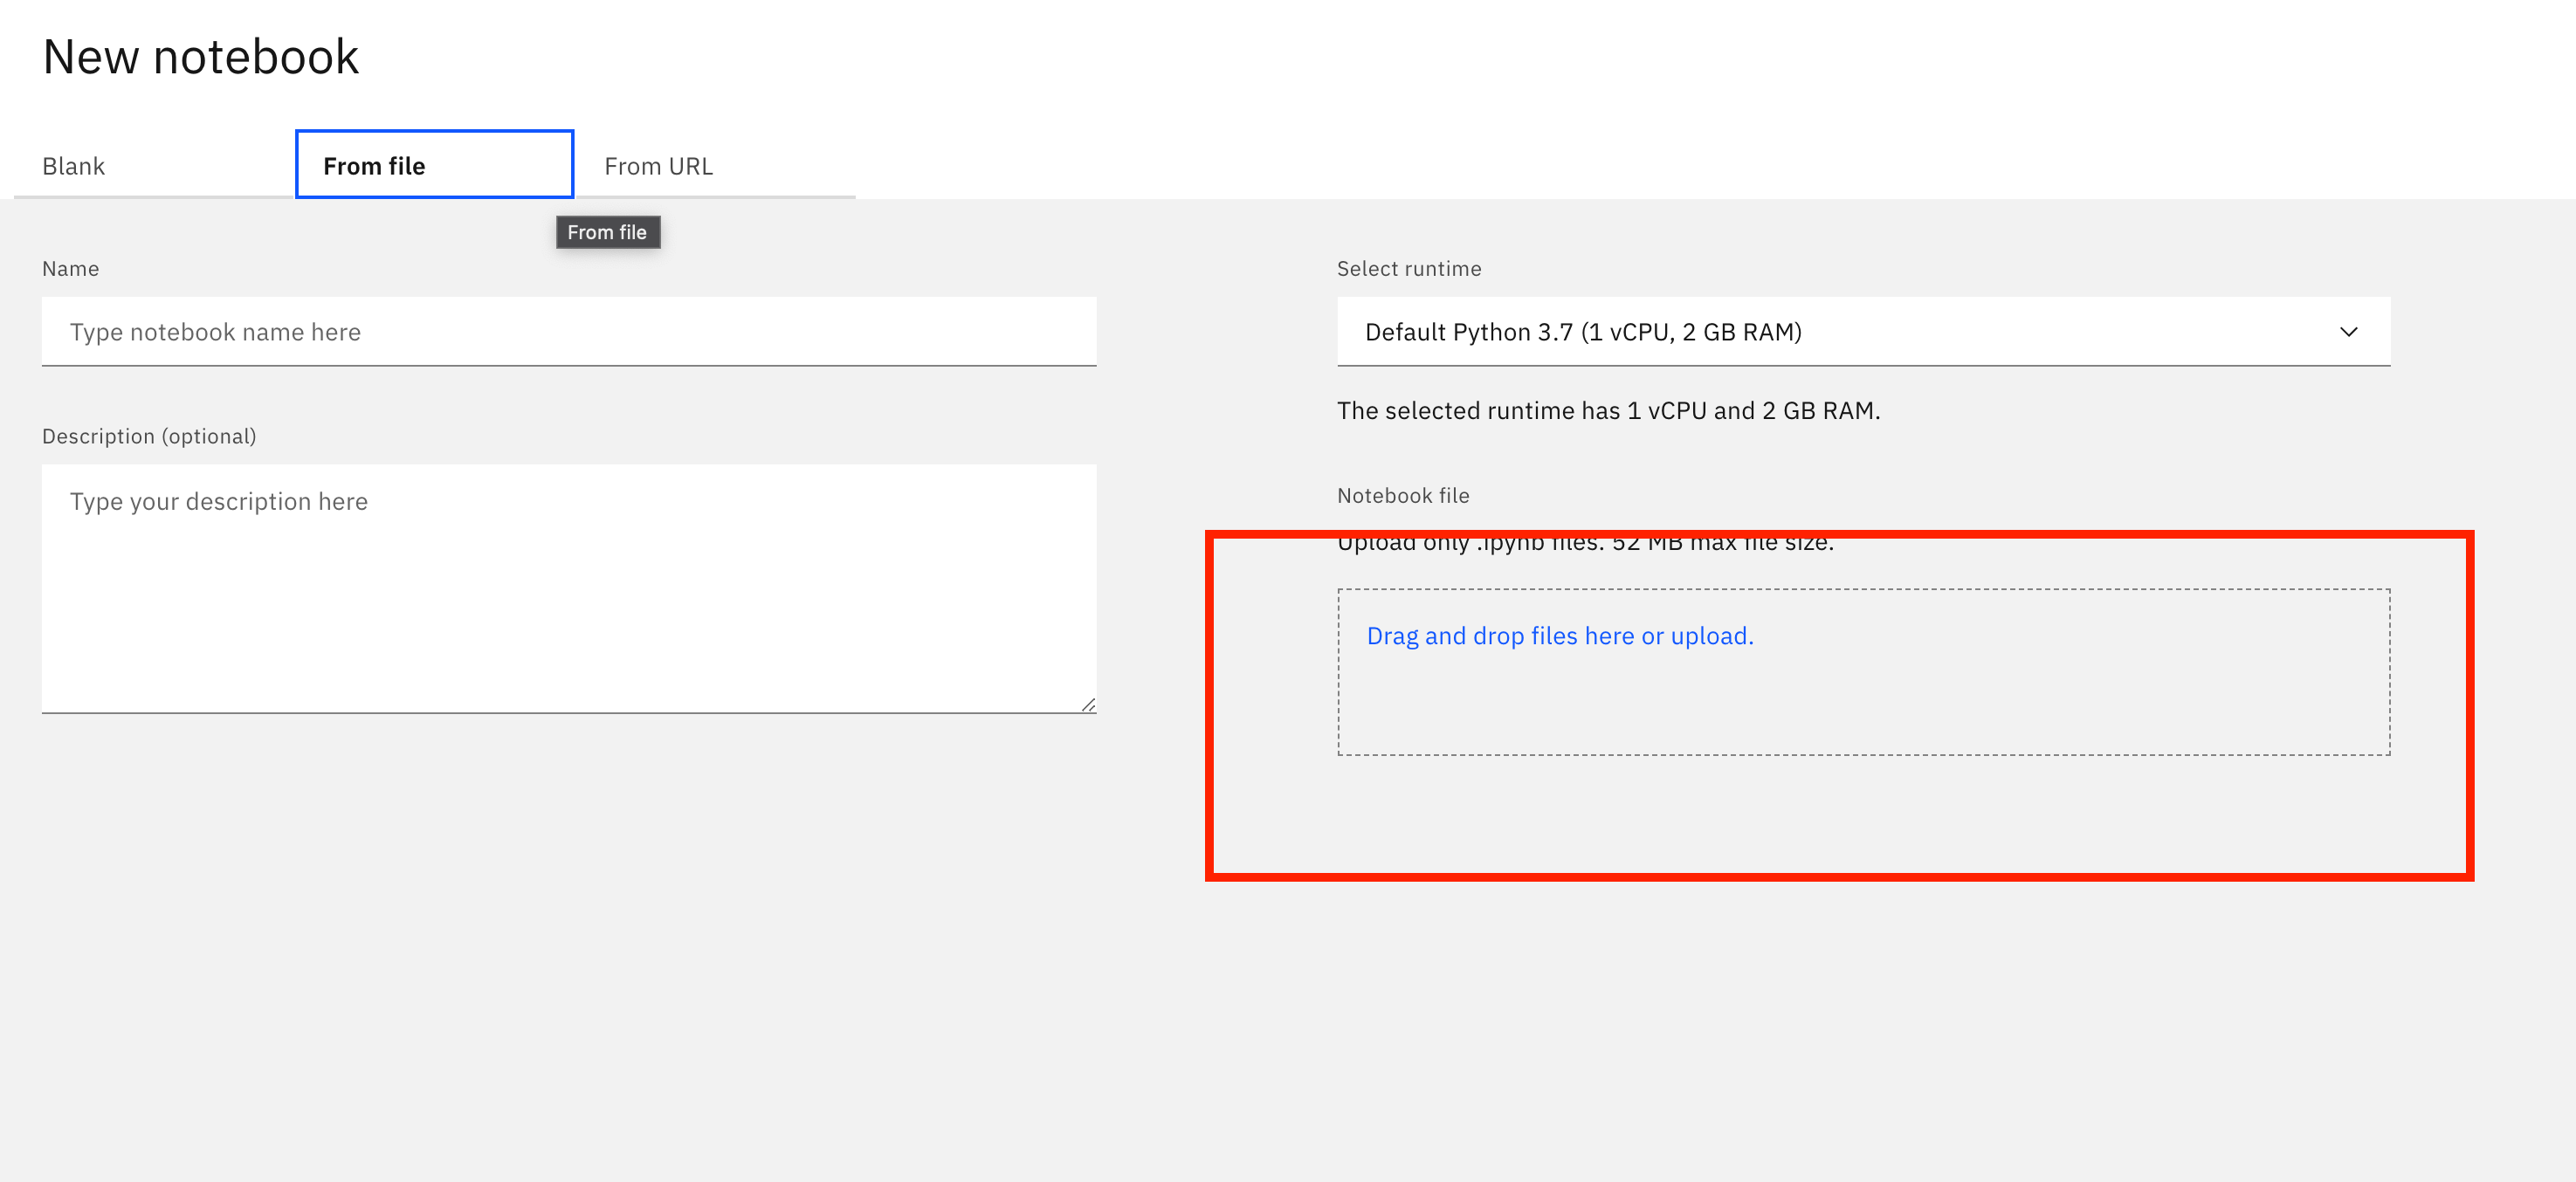

### 5. Upon uploading the notebook, the notebook should automatically open in edit mode with an active runtime.  From within the notebook, navigate to the 'File' menu and select 'Save Version':
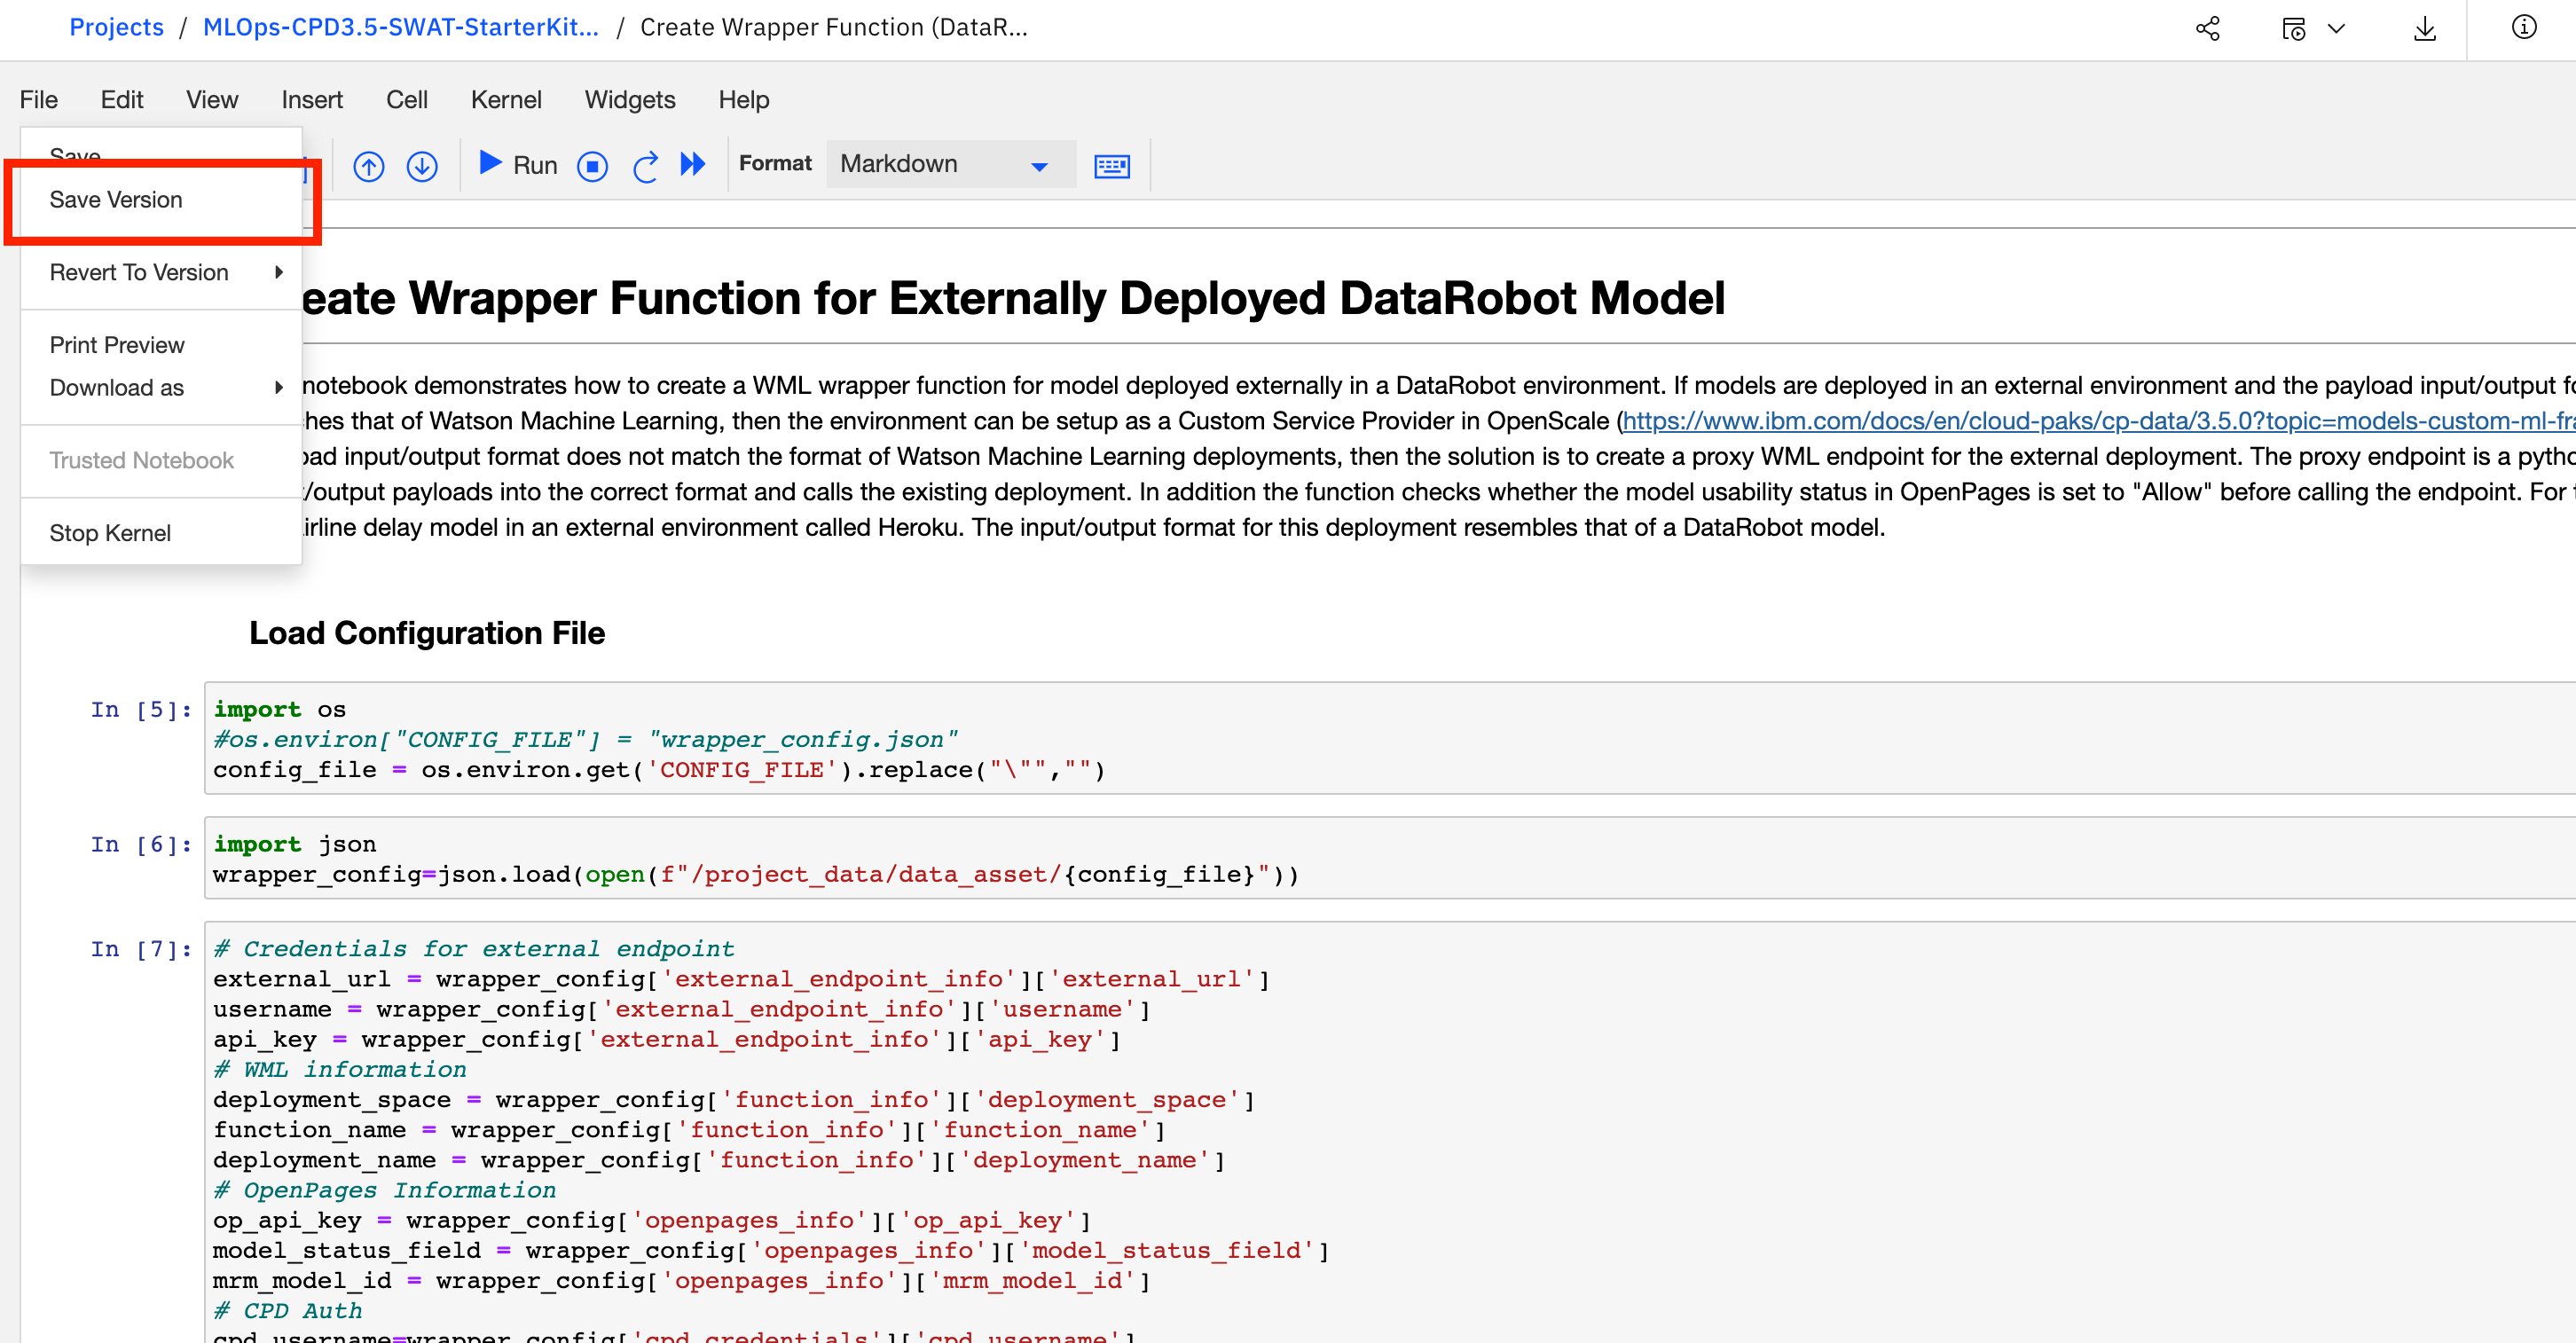

### 6. Select the icon with a window and a play button in the top righthand corner.  Then select 'Create a job':
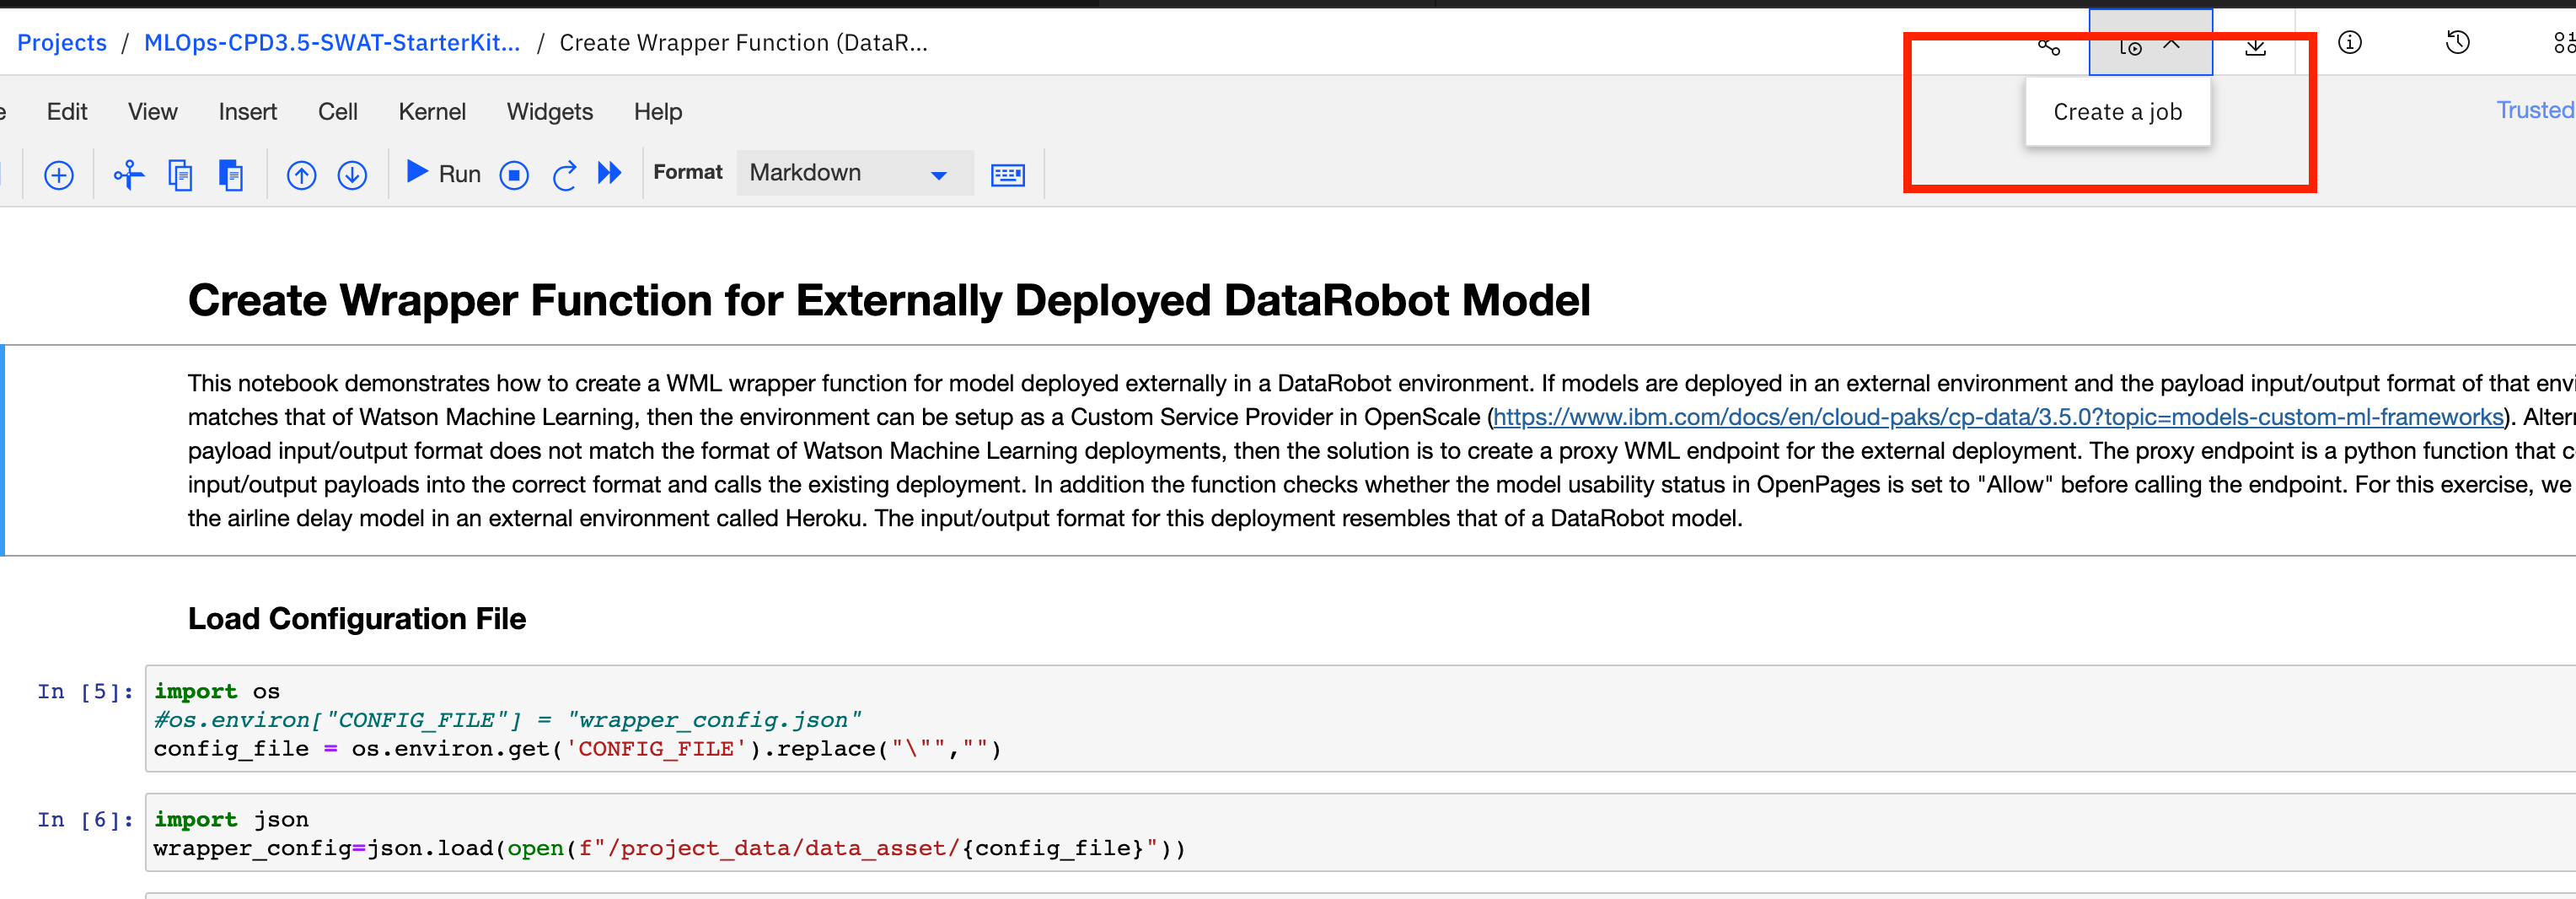

### 7. Give the job a name ('Create Wrapper Function DR Job'), then select 'Next' in the bottom righthand corner. 

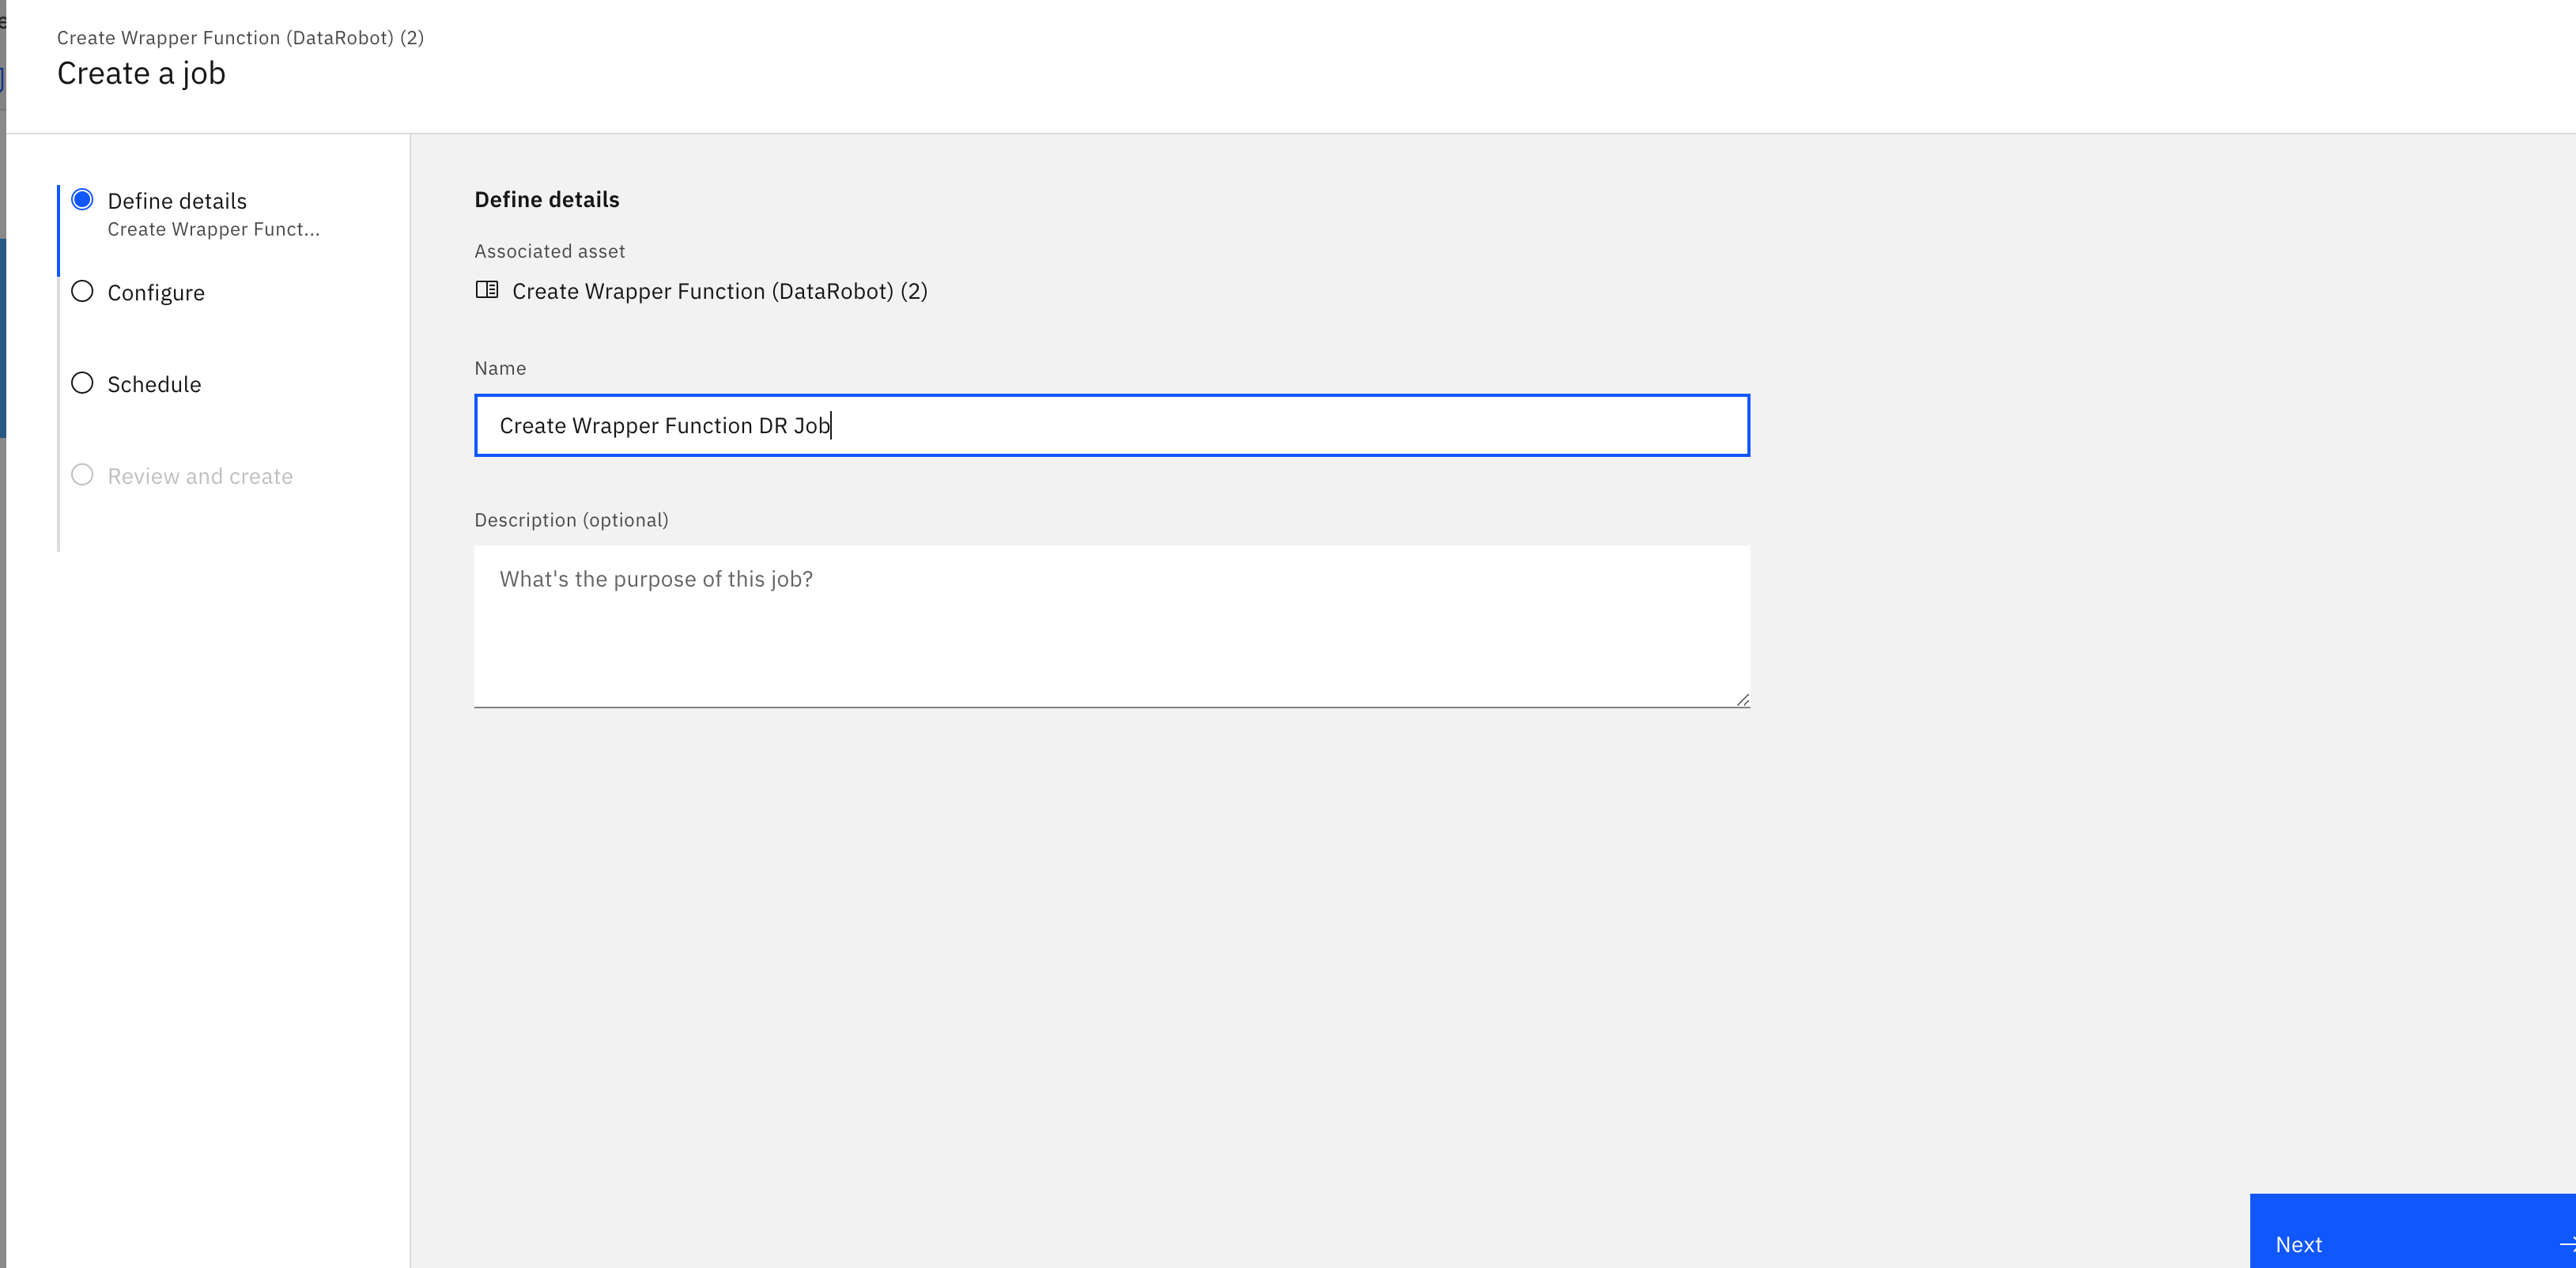

### 8. In the Configure section, leave the default values for 'Select version' ('latest') and 'Select environment' ('Default Python 3.7').  Then select the 'Advanced configuration' checkbox below the environment selection.  In the box that appears, enter the following: CONFIG_FILE=wrapper_config_ext.json .  Use the exact name of the JSON file that you uploaded to the project in Step 2.  Then select 'Next' in the bottom righthand corner.
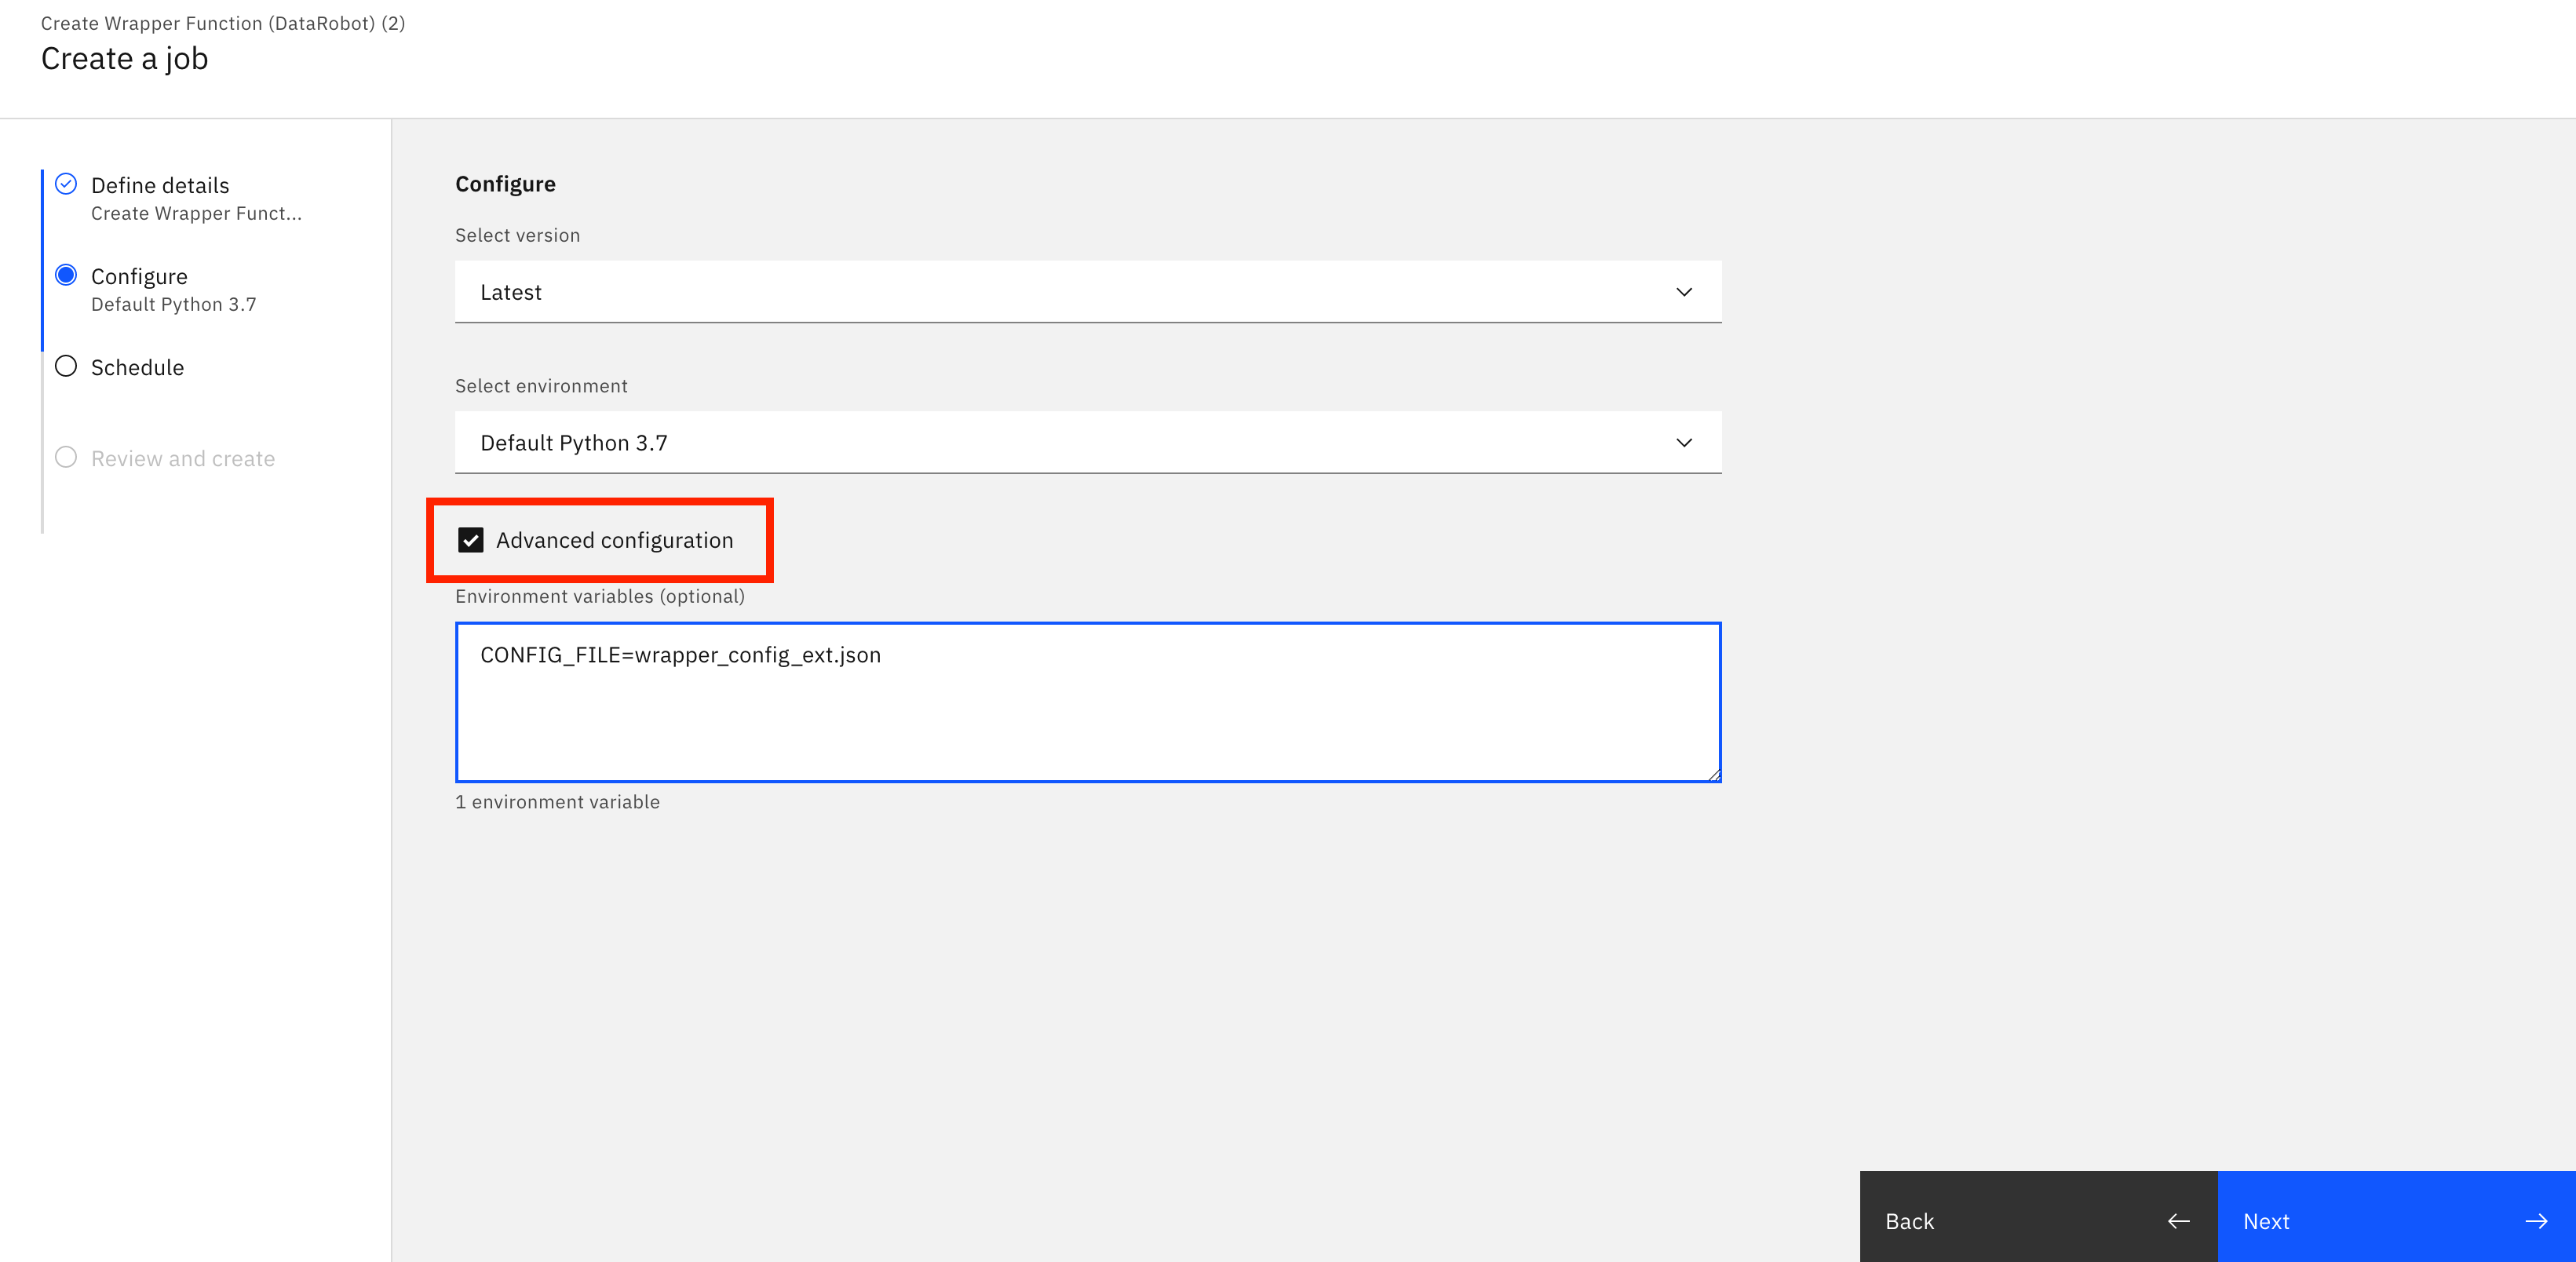

### 9. Leave the schedule screen as is ('Schedule Off'). Then select 'Next'.
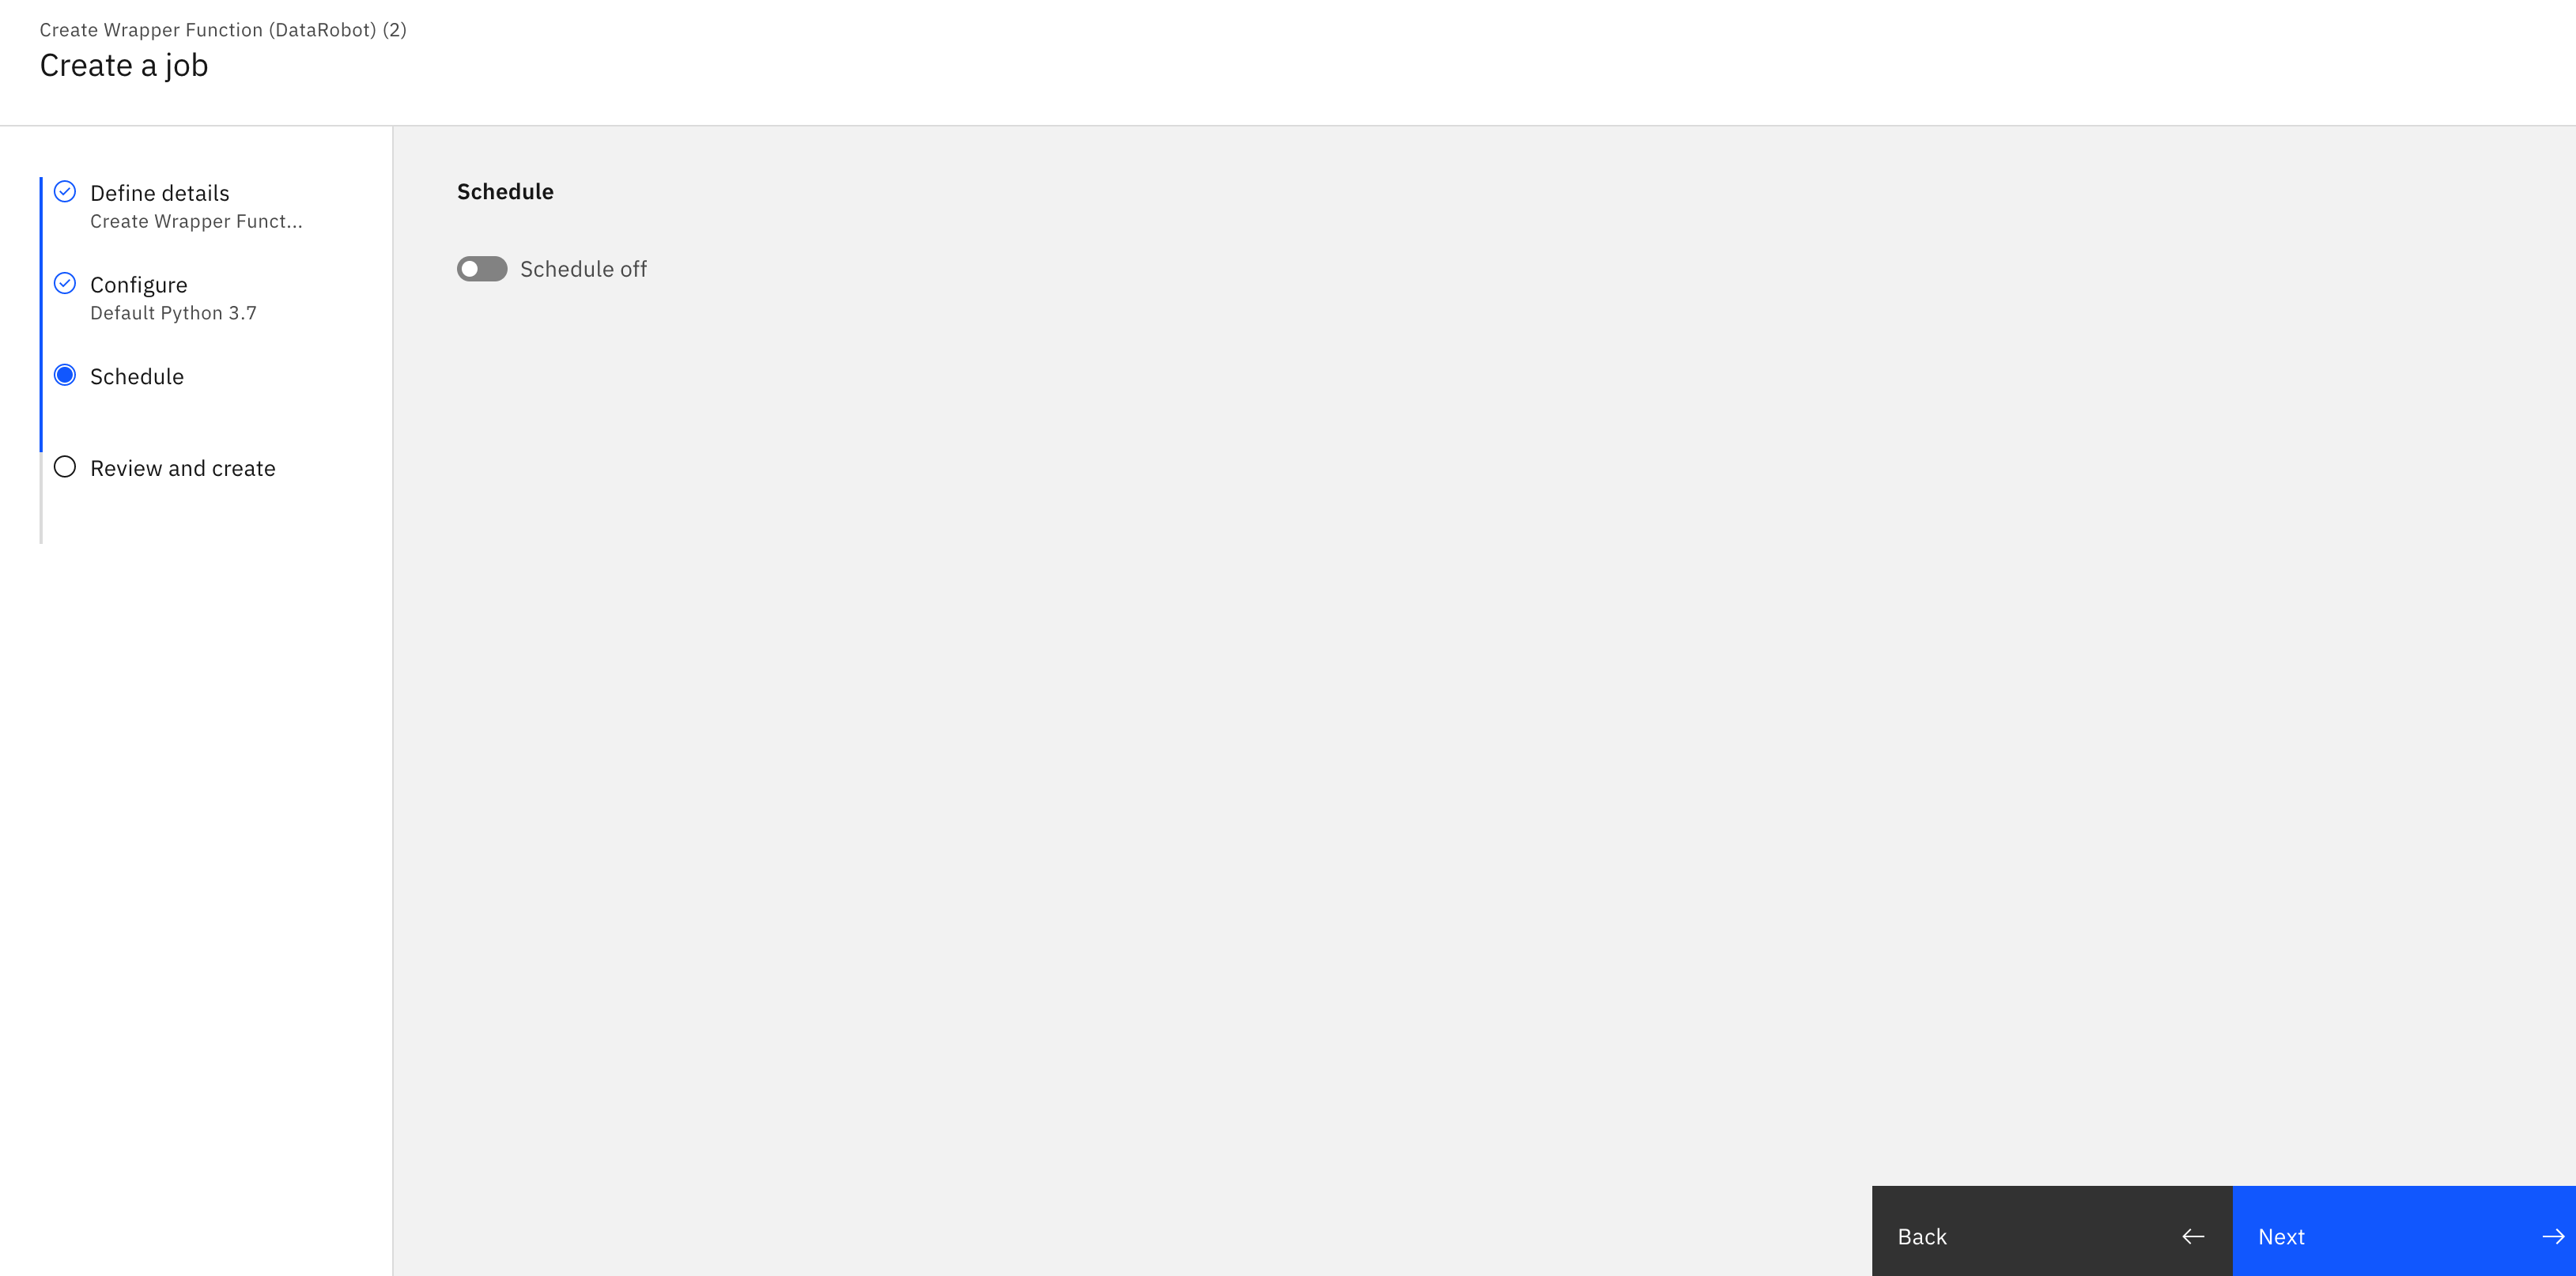

### 10. Select 'Create and Run' in the bottom righthand corner.  This will trigger the wrapper function to be created using the parameters that you provided.  Wait a couple of minutes for the job to complete. 
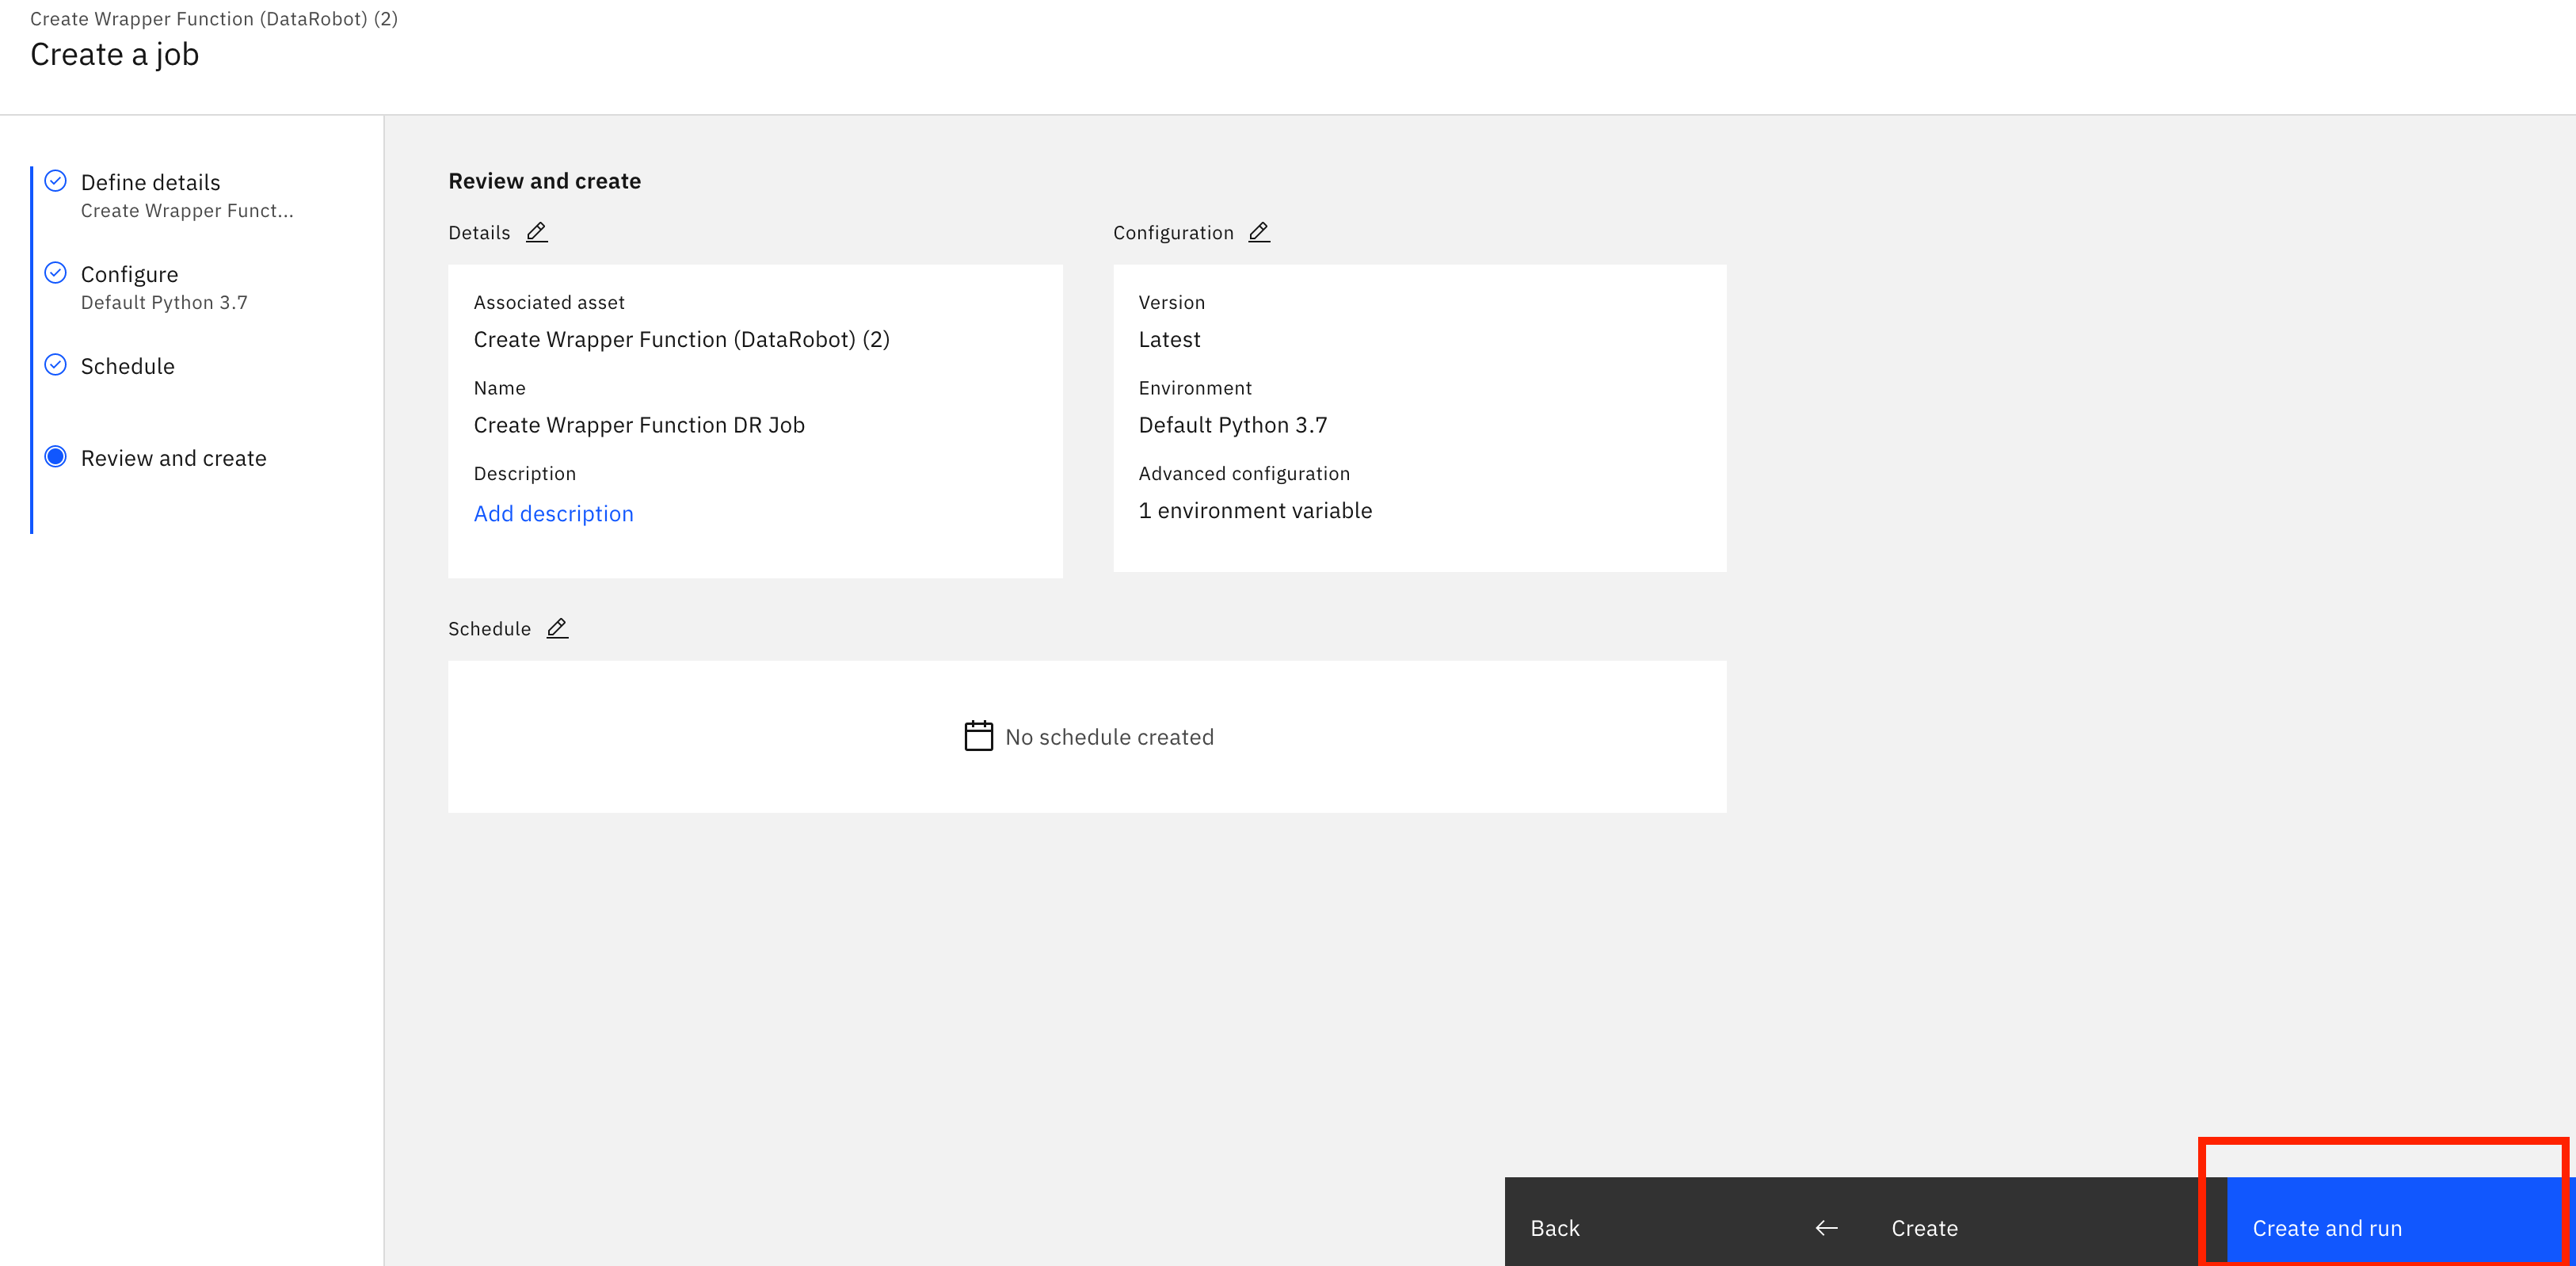


### 11. Once the job is complete, you can verify the function was created successfully by navigating to the deployment space and selecting the deployment with the name that you provided in the configuration JSON.  Select the 'Test' tab for the deployment.  Here you can send a sample scoring request to the deployment to verify that the prediction response is as expected.  To do so, paste the following into the 'Enter input data' section.  Then select 'Predict' and confirm that predictions are as expected.  


In [1]:
{"input_data":[{"fields":["DAY","DAY_OF_WEEK","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DELAY","TAXI_OUT","DISTANCE"],"values":[[11,7,"ABQ","DFW",2,11,570],[11,7,"ABQ","DFW",2,11,570]]}]}

{'input_data': [{'fields': ['DAY',
    'DAY_OF_WEEK',
    'ORIGIN_AIRPORT',
    'DESTINATION_AIRPORT',
    'DEPARTURE_DELAY',
    'TAXI_OUT',
    'DISTANCE'],
   'values': [[11, 7, 'ABQ', 'DFW', 2, 11, 570],
    [11, 7, 'ABQ', 'DFW', 2, 11, 570]]}]}

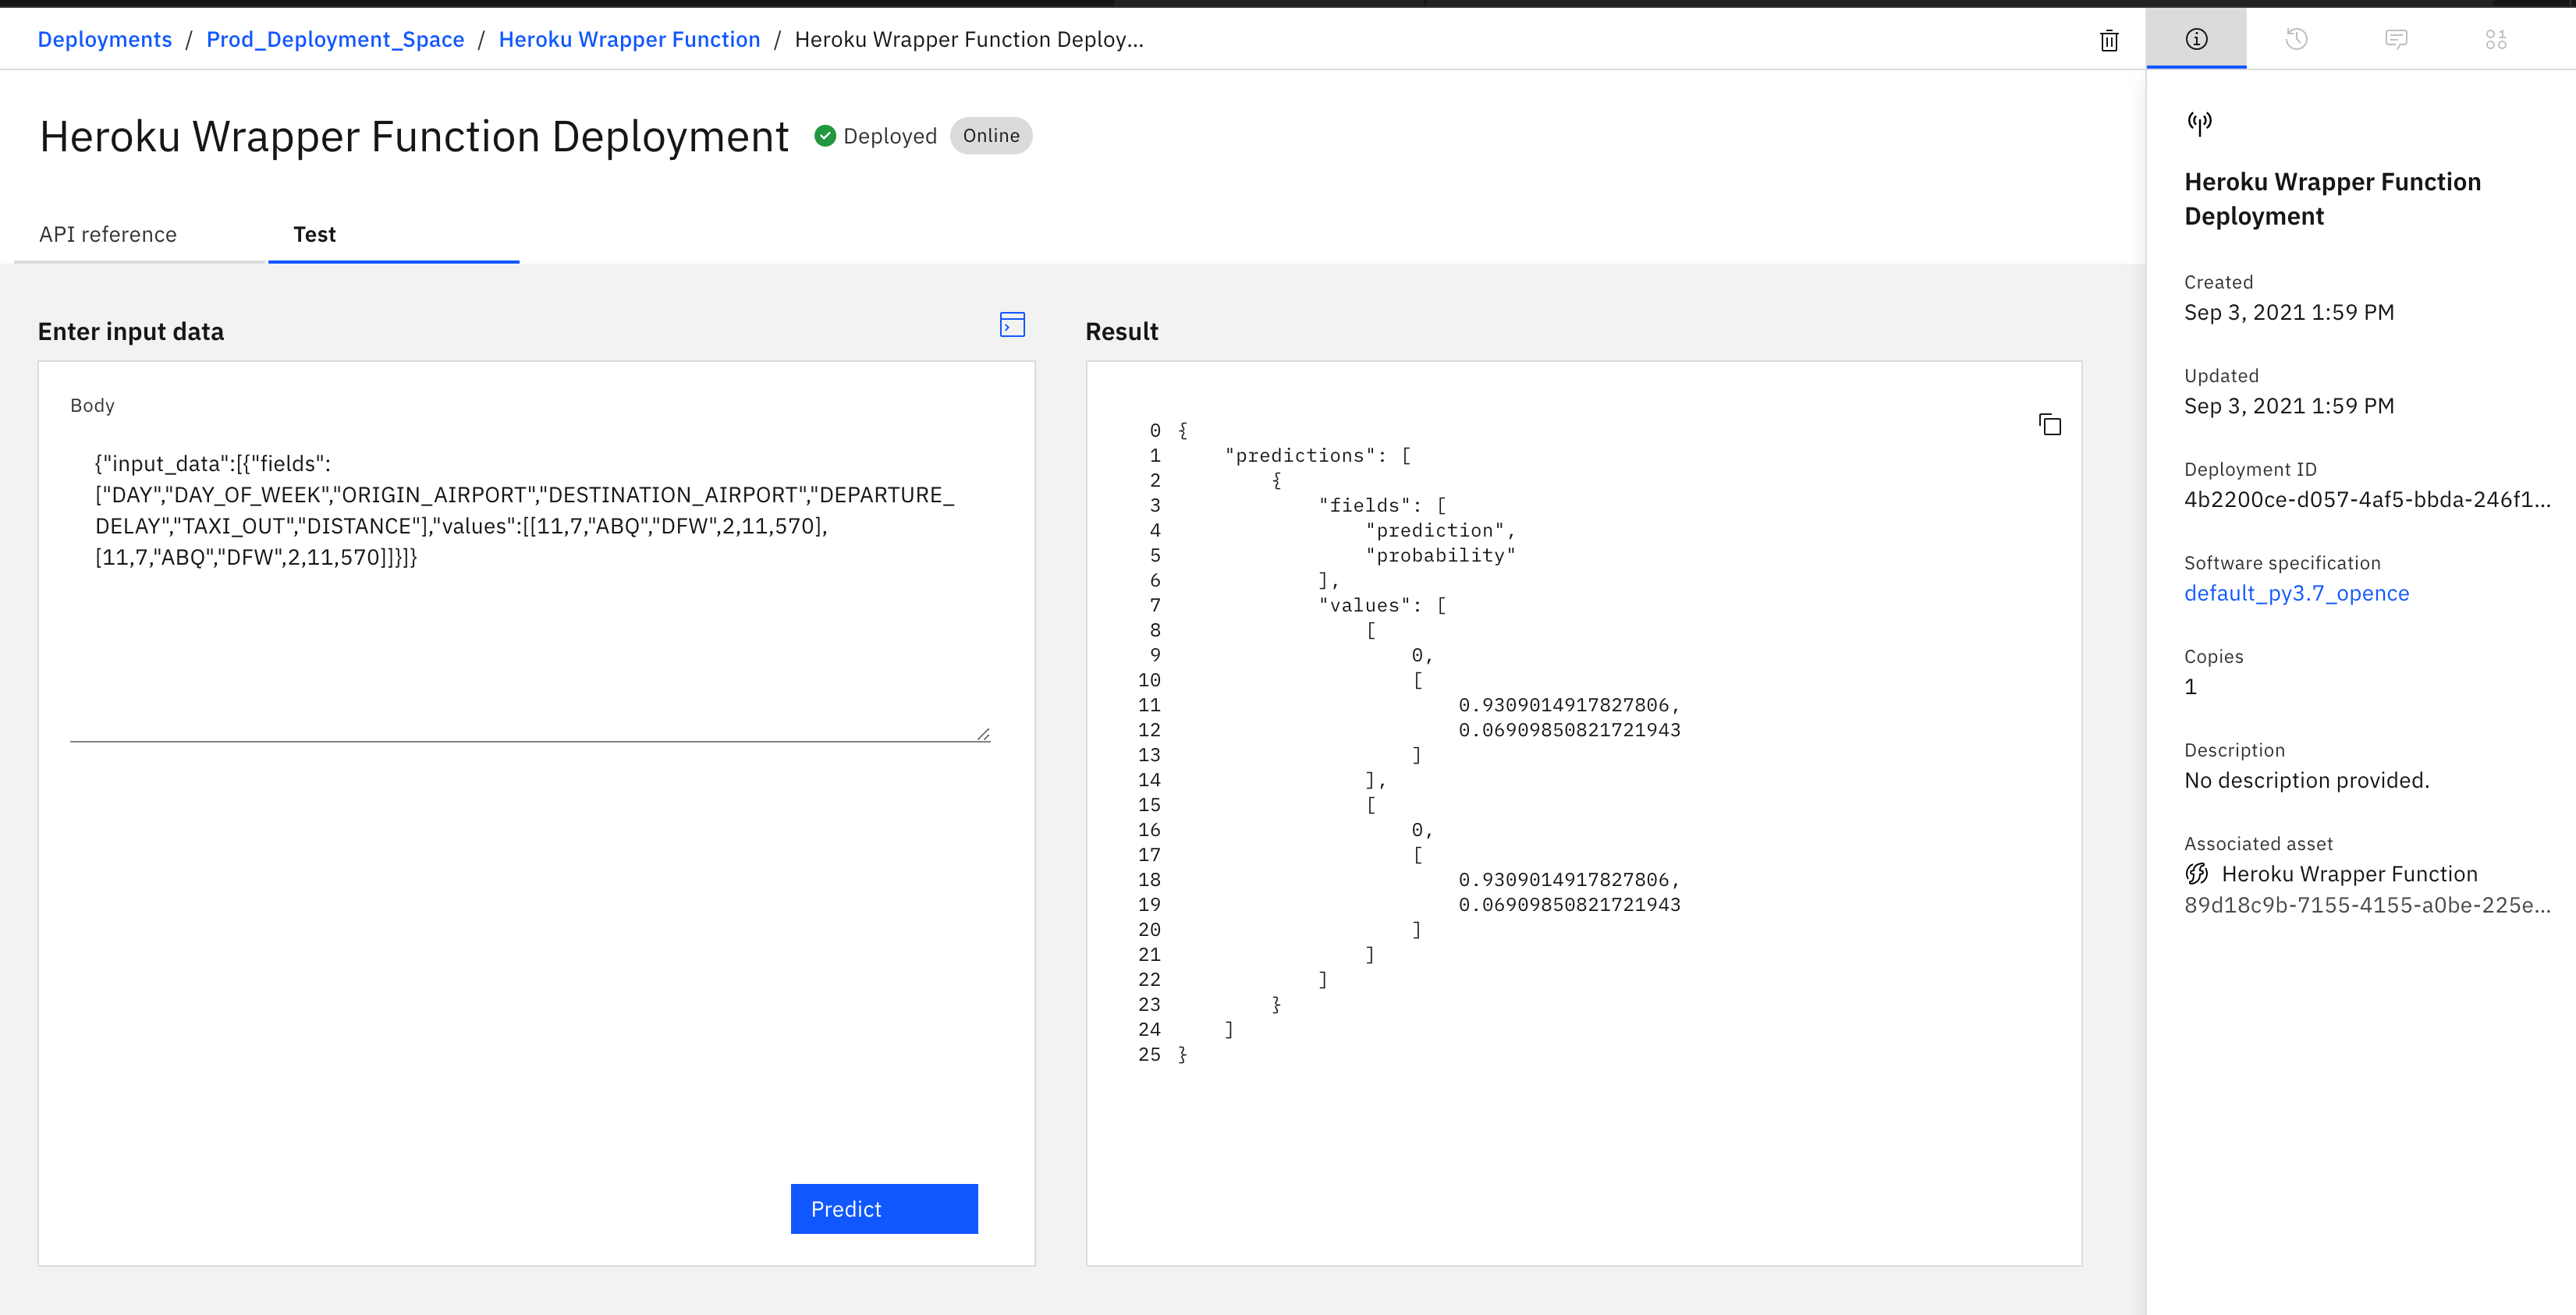